<a href="https://colab.research.google.com/github/niladri-rkmvu/dsa-2025/blob/12.graphs/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph ADT

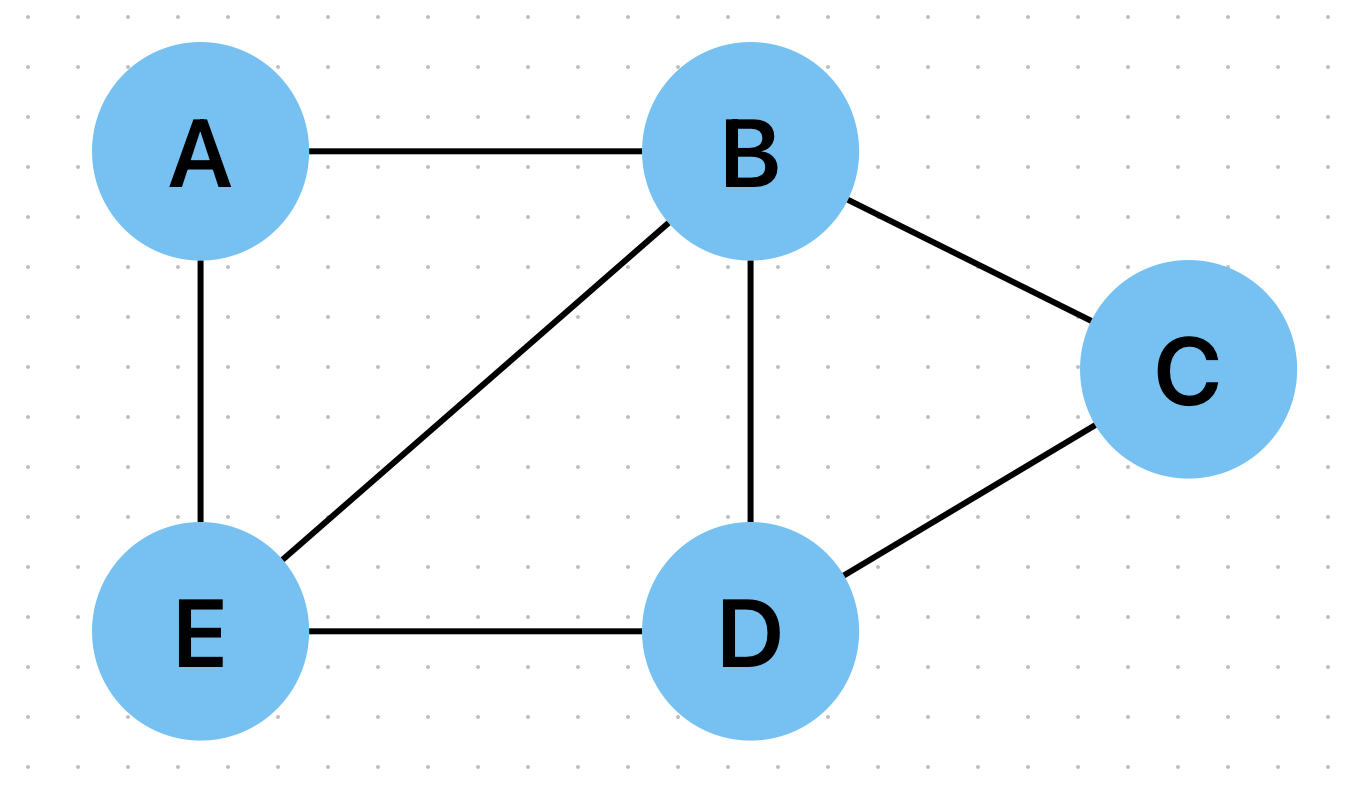



```
A : ['B', 'E']
B : ['A', 'D', 'E', 'C']
C : ['B', 'D']
D : ['B', 'C', 'E']
E : ['A', 'B', 'D']
```



In [1]:
class Graph:
    def __init__(self):
        self.adj_list = {}

    def print_graph(self):
        print("-----------")
        print(f"printing graph")
        print("----------- ")
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list:
            self.adj_list[vertex] = []
            return True
        else:
            print(f"Vertex {vertex} already exists")
            return False

    def add_vertices(self, vertices):
        for vertex in vertices:
            if vertex not in self.adj_list:
                self.adj_list[vertex] = []
            else:
                print(f"Vertex {vertex} already exists")
        return True

    def add_edge(self, v1, v2):
        if v1 in self.adj_list and v2 in self.adj_list:
            if v2 not in self.adj_list[v1]:
                self.adj_list[v1].append(v2)
            if v1 not in self.adj_list[v2]:
                self.adj_list[v2].append(v1)
            return True
        else:
            print(f"Cannot add edge, one or both vertices {v1}, {v2} do not exist")
            return False

    def remove_edge(self, v1, v2):
        if v1 not in self.adj_list or v2 not in self.adj_list:
            print(f"Cannot remove edge, one or both vertices {v1}, {v2} do not exist")
            return False

        if v2 in self.adj_list[v1]:
            self.adj_list[v1].remove(v2)
        if v1 in self.adj_list[v2]:
            self.adj_list[v2].remove(v1)
        return True

    def remove_vertex(self, vertex):
        if vertex not in self.adj_list:
            print(f"Vertex {vertex} does not exist")
            return False

        # iterate over a copy to avoid modification issues
        for other_vertex in list(self.adj_list[vertex]):
            self.adj_list[other_vertex].remove(vertex)

        del self.adj_list[vertex]
        return True


# Driver code
if __name__ == "__main__":
    g = Graph()

    print("=== Adding vertices ===")
    g.add_vertex('A')
    g.add_vertex('B')
    g.add_vertex('C')
    g.add_vertex('D')
    g.add_vertex('E')
    g.print_graph()

    print("\n=== Adding edges ===")
    g.add_edge('A','B')
    g.add_edge('A','E')

    g.add_edge('B','A')
    g.add_edge('B','D')
    g.add_edge('B','E')
    g.add_edge('B','C')

    g.add_edge('C','B')
    g.add_edge('C','D')

    g.add_edge('D','B')
    g.add_edge('D','C')
    g.add_edge('D','E')
    g.print_graph()

    print("\n=== Removing edges ===")
    g.remove_edge('A','E')   # valid removal
    g.print_graph()

    print("\n=== Removing vertices ===")
    g.remove_vertex('C')   # valid removal
    g.print_graph()

=== Adding vertices ===
-----------
printing graph
----------- 
A : []
B : []
C : []
D : []
E : []

=== Adding edges ===
-----------
printing graph
----------- 
A : ['B', 'E']
B : ['A', 'D', 'E', 'C']
C : ['B', 'D']
D : ['B', 'C', 'E']
E : ['A', 'B', 'D']

=== Removing edges ===
-----------
printing graph
----------- 
A : ['B']
B : ['A', 'D', 'E', 'C']
C : ['B', 'D']
D : ['B', 'C', 'E']
E : ['B', 'D']

=== Removing vertices ===
-----------
printing graph
----------- 
A : ['B']
B : ['A', 'D', 'E']
D : ['B', 'E']
E : ['B', 'D']


# Graph Traversals = BFS, DFS

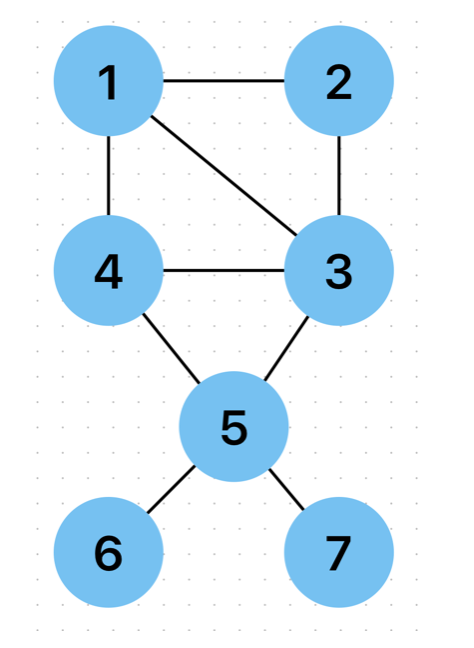

In [ ]:
from collections import deque

class Graph:
    def __init__(self):
        self.adj_list = {}

    def print_graph(self):
        print("-----------")
        print("printing graph")
        print("----------- ")
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list:
            self.adj_list[vertex] = []
            return True
        else:
            # print(f"Vertex {vertex} already exists")
            return False

    def add_vertices(self, vertices):
        for vertex in vertices:
            if vertex not in self.adj_list:
                self.adj_list[vertex] = []
        return True

    def add_edge(self, v1, v2):
        if v1 in self.adj_list and v2 in self.adj_list:
            if v2 not in self.adj_list[v1]:
                self.adj_list[v1].append(v2)
            if v1 not in self.adj_list[v2]:
                self.adj_list[v2].append(v1)
            return True
        else:
            # print(f"Cannot add edge, one or both vertices {v1}, {v2} do not exist")
            return False

    def remove_edge(self, v1, v2):
        if v1 not in self.adj_list or v2 not in self.adj_list:
            # print(f"Cannot remove edge, one or both vertices {v1}, {v2} do not exist")
            return False

        if v2 in self.adj_list[v1]:
            self.adj_list[v1].remove(v2)
        if v1 in self.adj_list[v2]:
            self.adj_list[v2].remove(v1)
        return True

    def remove_vertex(self, vertex):
        if vertex not in self.adj_list:
            # print(f"Vertex {vertex} does not exist")
            return False

        for other_vertex in list(self.adj_list[vertex]):
            self.adj_list[other_vertex].remove(vertex)

        del self.adj_list[vertex]
        return True

    # BFS logic using queue
    def bfs(self, start_vertex):
        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []

        explored = set([start_vertex])
        queue = deque([start_vertex])
        traversal_order = []

        while queue:
            current = queue.popleft()
            traversal_order.append(current)   # add when dequeued
            for neighbor in self.adj_list[current]:
                if neighbor not in explored:
                    explored.add(neighbor)
                    queue.append(neighbor)
        return traversal_order

    # Iterative DFS using stack
    # Student exercise
    def dfs_iterative(self, start_vertex):
        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []

        visited = set()
        stack = [start_vertex]
        traversal_order = []

        while stack:
            current = stack.pop()
            if current not in visited:
                visited.add(current)
                traversal_order.append(current)

                for neighbor in self.adj_list[current]:
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal_order

    # Recursive DFS
    def dfs_recursive(self, start_vertex):
        visited = set()
        traversal_order = []

        def dfs(v):
            visited.add(v)
            traversal_order.append(v)
            for neighbor in self.adj_list[v]:
                if neighbor not in visited:
                    dfs(neighbor)

        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []
        dfs(start_vertex)
        return traversal_order

if __name__ == "__main__":
    g = Graph()
    vertex_edge_dict = {
                1 : [2, 3, 4],
                2 : [1, 3],
                3 : [1, 2, 4, 5],
                4 : [1, 3, 5],
                5 : [3, 4, 6, 7],
                6 : [5],
                7 : [5]
    }
    for vertex, edges in vertex_edge_dict.items():
        g.add_vertex(vertex)
        for edge in edges:
            g.add_edge(vertex, edge)
    g.add_vertices([1,2,3,4,5])
    g.print_graph()

    print("\n=== BFS Traversal from vertex 1 ===")
    print(g.bfs(1))   # Expected: [1, 2, 3, 4, 5, 6, 7] <-- 1 possibility

    print("\n=== BFS Traversal from vertex 7 ===")
    print(g.bfs(7))   # Expected: [7, 5, 3, 4, 6, 1, 2] <-- 1 possibility

    print("\n=== DFS Recursive Traversal from vertex 1 ===")
    print(g.dfs_recursive(1))   # One possible order: [1, 2, 3, 4, 5, 6, 7]

    print("\n=== DFS Iterative Traversal from vertex 1 ===")
    print(g.dfs_iterative(1))   # One possible order: [1, 2, 3, 4, 5, 6, 7]

    print("\n=== DFS Recursive Traversal from vertex 7 ===")
    print(g.dfs_recursive(7))   # One possible order: [7, 5, 3, 1, 2, 4, 6]

    print("\n=== DFS Iterative Traversal from vertex 7 ===")
    print(g.dfs_iterative(7))   # One possible order: [7, 5, 3, 1, 2, 4, 6]


-----------
printing graph
----------- 
1 : [2, 3, 4]
2 : [1, 3]
3 : [1, 2, 4, 5]
4 : [1, 3, 5]
5 : [3, 4, 6, 7]
6 : [5]
7 : [5]

=== BFS Traversal from vertex 1 ===
[1, 2, 3, 4, 5, 6, 7]

=== BFS Traversal from vertex 7 ===
[7, 5, 3, 4, 6, 1, 2]

=== DFS Recursive Traversal from vertex 1 ===
[1, 2, 3, 4, 5, 6, 7]

=== DFS Iterative Traversal from vertex 1 ===
[1, 4, 5, 7, 6, 3, 2]

=== DFS Recursive Traversal from vertex 7 ===
[7, 5, 3, 1, 2, 4, 6]

=== DFS Iterative Traversal from vertex 7 ===
[7, 5, 6, 4, 3, 2, 1]


# Spanning Trees

Total spanning trees: 16


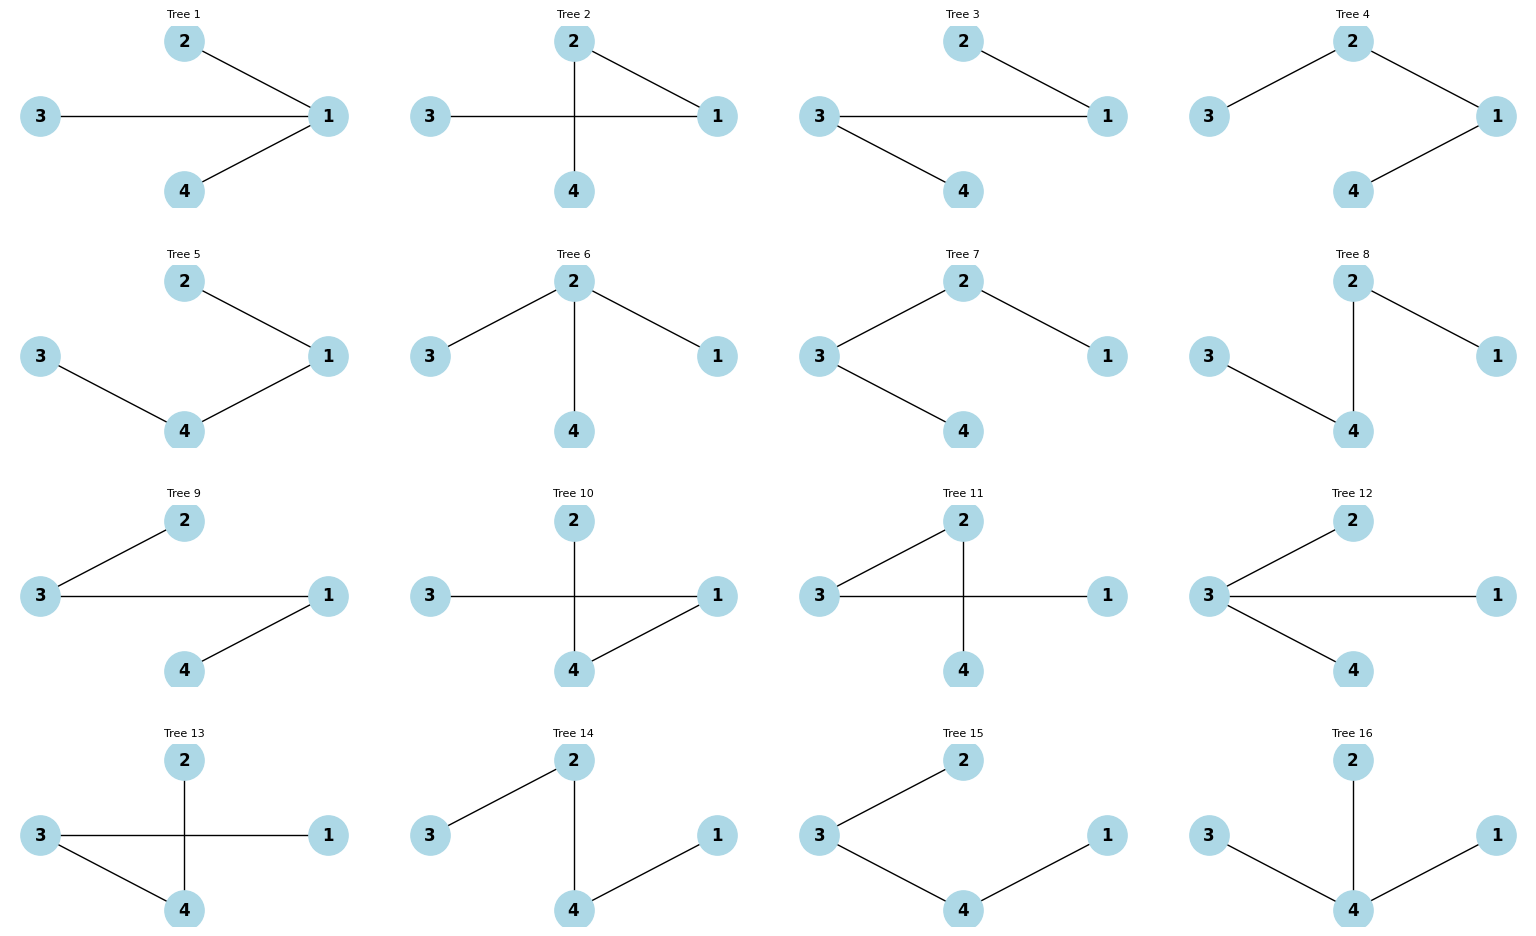

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def all_spanning_trees(G):
    n = G.number_of_nodes()
    spanning_trees = []
    for edges in combinations(G.edges(), n-1):
        T = nx.Graph()
        T.add_nodes_from(G.nodes())
        T.add_edges_from(edges)
        if nx.is_tree(T):
            spanning_trees.append(T)
    return spanning_trees

def visualize_spanning_trees(G):
    trees = all_spanning_trees(G)
    n = len(trees)
    cols = 4
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(16, 10))  # bigger canvas

    for i, T in enumerate(trees, 1):
        plt.subplot(rows, cols, i)
        # Option 1: circular layout (no overlap)
        pos = nx.circular_layout(T)
        # Option 2: spring layout with more spacing
        # pos = nx.spring_layout(T, seed=i, k=0.8)  # k controls spacing

        nx.draw(
            T, pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_weight="bold",
            edge_color="black"
        )
        plt.title(f"Tree {i}", fontsize=8)

    plt.tight_layout(pad=3.0)  # extra padding between subplots
    plt.show()

if __name__ == "__main__":
    G = nx.complete_graph([1, 2, 3, 4])
    trees = all_spanning_trees(G)
    print(f"Total spanning trees: {len(trees)}")
    visualize_spanning_trees(G)

# Spanning trees with costs

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def build_graph_from_adjlist(adjlist):
    G = nx.Graph()
    for u, neighbors in adjlist.items():
        for v, w in neighbors:
            G.add_edge(u, v, weight=w)
    return G

def all_spanning_trees(G):
    n = G.number_of_nodes()
    spanning_trees = []
    for edges in combinations(G.edges(data=True), n-1):
        T = nx.Graph()
        T.add_nodes_from(G.nodes())
        T.add_edges_from(edges)
        if nx.is_tree(T):
            spanning_trees.append(T)
    return spanning_trees

def visualize_spanning_trees(G, trees):
    n = len(trees)
    cols = 4
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(16, 10))

    for i, T in enumerate(trees, 1):
        plt.subplot(rows, cols, i)
        pos = nx.circular_layout(T)

        nx.draw(
            T, pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_weight="bold",
            edge_color="black"
        )

        # Show edge weights
        edge_labels = nx.get_edge_attributes(T, 'weight')
        nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels)

        # Show total cost
        total_cost = sum(edge_labels.values())
        plt.title(f"Tree {i}\nCost={total_cost}", fontsize=12)

    plt.tight_layout(pad=3.0)
    plt.show()

if __name__ == "__main__":
    # Example adjacency list with weights
    # adjlist = {
    #     '1': [('2', 1), ('3', 2), ('4', 3)],
    #     '2': [('1', 1), ('3', 4), ('4', 5)],
    #     '3': [('1', 2), ('2', 4), ('4', 6)],
    #     '4': [('1', 3), ('2', 5), ('3', 6)]
    # }

    adjlist = {
    '1': [('2', 28), ('6', 10)],
    '2': [('1', 28), ('3', 16), ('7', 14)],
    '3': [('2', 16), ('4', 12)],
    '4': [('3', 12), ('7', 18), ('5', 22)],
    '5': [('4', 22), ('7', 24), ('6', 25)],
    '6': [('1', 10), ('5', 25)],
    '7': [('2', 14), ('4', 18), ('5', 24)]
    }

    G = build_graph_from_adjlist(adjlist)
    trees = all_spanning_trees(G)

    # Control flag: set True to visualize, False to only count
    SHOW_VISUALIZATION = False

    print(f"Total spanning trees: {len(trees)}")
    if SHOW_VISUALIZATION:
        visualize_spanning_trees(G, trees)

Total spanning trees: 46


# Min Cost Spanning Tree


*   Kruskal - use of disjoint set and min heap
*   Prim



Considering edge (6, 7) with weight 1
Accepted edge (6, 7), current cost = 1
Considering edge (2, 8) with weight 2
Accepted edge (2, 8), current cost = 3
Considering edge (5, 6) with weight 2
Accepted edge (5, 6), current cost = 5
Considering edge (0, 1) with weight 4
Accepted edge (0, 1), current cost = 9
Considering edge (2, 5) with weight 4
Accepted edge (2, 5), current cost = 13
Considering edge (6, 8) with weight 6
Skipped edge (6, 8) to avoid cycle
Considering edge (2, 3) with weight 7
Accepted edge (2, 3), current cost = 20
Considering edge (7, 8) with weight 7
Skipped edge (7, 8) to avoid cycle
Considering edge (0, 7) with weight 8
Accepted edge (0, 7), current cost = 28
Considering edge (1, 2) with weight 8
Skipped edge (1, 2) to avoid cycle
Considering edge (3, 4) with weight 9
Accepted edge (3, 4), current cost = 37
Kruskal MST: [(6, 7, 1), (2, 8, 2), (5, 6, 2), (0, 1, 4), (2, 5, 4), (2, 3, 7), (0, 7, 8), (3, 4, 9)] Cost: 37


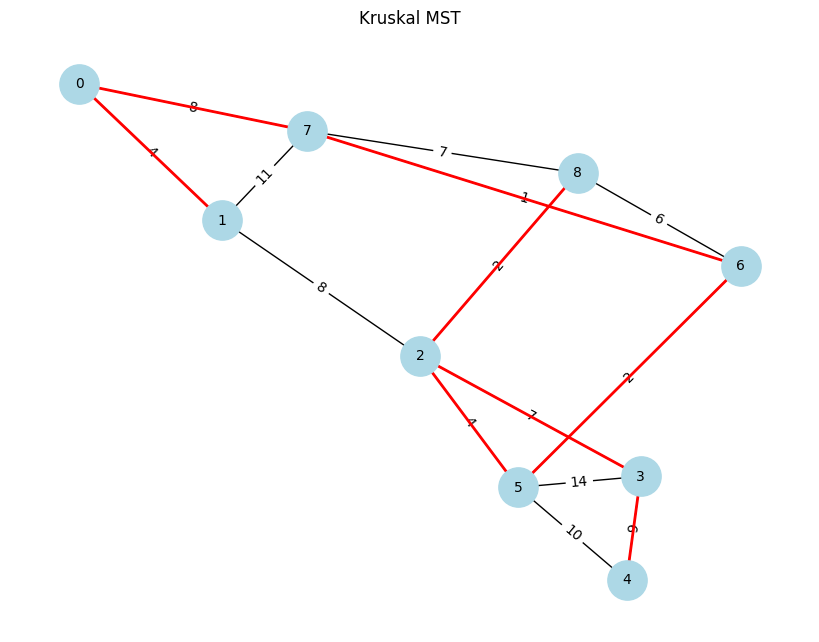

Added edge (0, 1) with weight 4, current cost = 4
Added edge (1, 2) with weight 8, current cost = 12
Added edge (2, 8) with weight 2, current cost = 14
Added edge (2, 5) with weight 4, current cost = 18
Added edge (5, 6) with weight 2, current cost = 20
Added edge (6, 7) with weight 1, current cost = 21
Added edge (2, 3) with weight 7, current cost = 28
Added edge (3, 4) with weight 9, current cost = 37
Prim MST: [(0, 1, 4), (1, 2, 8), (2, 8, 2), (2, 5, 4), (5, 6, 2), (6, 7, 1), (2, 3, 7), (3, 4, 9)] Cost: 37


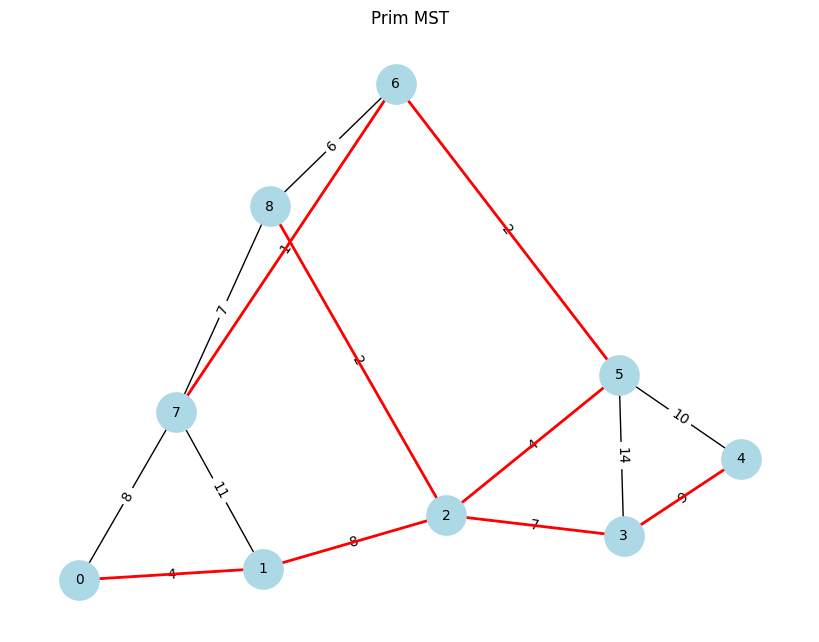

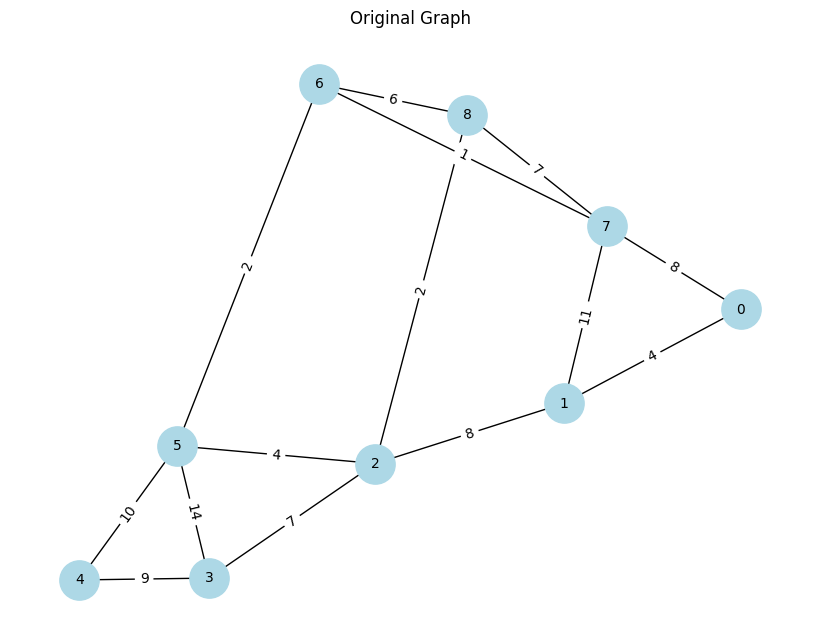

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class MinCostSpanningTree:
    def __init__(self, adjacency_list, debug=False):
        self.graph = adjacency_list
        self.vertices = list(adjacency_list.keys())
        self.edges = self._extract_edges()
        self.debug = debug
        self.validate_undirected()

    # -----------------------------
    # Disjoint Set (Union-Find)
    # -----------------------------
    class DisjointSet:
        def __init__(self, vertices):
            self.parent = {v: v for v in vertices}
            self.rank = {v: 0 for v in vertices}

        def find(self, v):
            if self.parent[v] != v:
                self.parent[v] = self.find(self.parent[v])  # Path compression
            return self.parent[v]

        def union(self, u, v):
            root_u, root_v = self.find(u), self.find(v)
            if root_u == root_v:
                return False
            if self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            elif self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
            return True

    # -----------------------------
    # Helper: Extract edges
    # -----------------------------
    def _extract_edges(self):
        edges = []
        for u in self.graph:
            for v, w in self.graph[u]:
                if u < v:  # avoid duplicates in undirected graph
                    edges.append((w, u, v))
        return edges

    # -----------------------------
    # Validation
    # -----------------------------
    def validate_undirected(self):
        for u in self.graph:
            for v, w in self.graph[u]:
                if u == v:
                    continue
                if v not in self.graph:
                    raise ValueError(f"Neighbor {v} of {u} not in vertices.")
                if (u, w) not in {(x, wt) for x, wt in self.graph[v]}:
                    raise ValueError(f"Asymmetry: ({u},{v})={w} missing in adj[{v}].")

    # -----------------------------
    # Kruskal's Algorithm
    # -----------------------------
    def kruskal_mst(self):
        ds = self.DisjointSet(self.vertices)
        mst_edges = []
        total_cost = 0

        edges_heap = self.edges[:]
        heapq.heapify(edges_heap)

        while edges_heap and len(mst_edges) < len(self.vertices) - 1:
            w, u, v = heapq.heappop(edges_heap)
            if self.debug:
                print(f"Considering edge ({u}, {v}) with weight {w}")
            if ds.union(u, v):
                mst_edges.append((u, v, w))
                total_cost += w
                if self.debug:
                    print(f"Accepted edge ({u}, {v}), current cost = {total_cost}")
            elif self.debug:
                print(f"Skipped edge ({u}, {v}) to avoid cycle")

        return mst_edges, total_cost

    # -----------------------------
    # Prim's Algorithm
    # -----------------------------
    def prim_mst(self, start=None):
        if start is None:
            start = next(iter(self.vertices))
        visited = set()
        mst_edges = []
        total_cost = 0

        min_heap = [(0, start, None)]  # (weight, vertex, parent)
        while min_heap and len(visited) < len(self.vertices):
            w, u, parent = heapq.heappop(min_heap)
            if u in visited:
                continue
            visited.add(u)
            if parent is not None:
                mst_edges.append((parent, u, w))
                total_cost += w
                if self.debug:
                    print(f"Added edge ({parent}, {u}) with weight {w}, current cost = {total_cost}")
            for v, weight in self.graph[u]:
                if v not in visited:
                    heapq.heappush(min_heap, (weight, v, u))

        return mst_edges, total_cost

    # -----------------------------
    # Visualization
    # -----------------------------
    def visualize(self, mst_edges=None, title="Graph"):
        G = nx.Graph()
        for u in self.graph:
            for v, w in self.graph[u]:
                G.add_edge(u, v, weight=w)

        pos = nx.spring_layout(G)
        edge_labels = nx.get_edge_attributes(G, 'weight')

        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        if mst_edges:
            mst_graph = nx.Graph()
            mst_graph.add_weighted_edges_from(mst_edges)
            nx.draw_networkx_edges(G, pos, edgelist=mst_graph.edges(), edge_color='red', width=2)

        plt.title(title)
        plt.show()

# -----------------------------
# Driver code
# -----------------------------
if __name__ == "__main__":
    adj_list = {
        0: [(1, 4), (7, 8)],
        1: [(0, 4), (2, 8), (7, 11)],
        2: [(1, 8), (3, 7), (8, 2), (5, 4)],
        3: [(2, 7), (4, 9), (5, 14)],
        4: [(3, 9), (5, 10)],
        5: [(2, 4), (3, 14), (4, 10), (6, 2)],
        6: [(5, 2), (7, 1), (8, 6)],
        7: [(0, 8), (1, 11), (6, 1), (8, 7)],
        8: [(2, 2), (6, 6), (7, 7)]
    }

    mst_solver = MinCostSpanningTree(adj_list, debug=True)

    # Kruskal
    kruskal_edges, kruskal_cost = mst_solver.kruskal_mst()
    print("Kruskal MST:", kruskal_edges, "Cost:", kruskal_cost)
    mst_solver.visualize(kruskal_edges, title="Kruskal MST")

    # Prim
    prim_edges, prim_cost = mst_solver.prim_mst(start=0)
    print("Prim MST:", prim_edges, "Cost:", prim_cost)
    mst_solver.visualize(prim_edges, title="Prim MST")

    # Original graph visualization
    mst_solver.visualize(title="Original Graph")